Alex Zeng, 1007099373
collaborator: none

**General tips for computing and plotting discrete fourier transforms (DFT)**

- Let g(t) be some time signal that’s sampled at $dt$ to get a discrete array/list `g = [ … ]`
- You don’t need to code your own DFT, use numpy:  `A = numpy.fft.fft(g) * dt`
- You should also use `numpy.fft.fftshift( A )` to shift the fft output such that the 0-frequency component is centered (see why here https://docs.scipy.org/doc/numpy/reference/routines.fft.html#background-information) which you probably want when plotting
- You can use `f_axis = numpy.fft.fftshift( numpy.fft.fftfreq(len(g), dt) )` to create the frequency axis for plotting the shifted spectrum
- Keep in mind the fft output is in general complex, so to compare two fourier transforms (e.g. DFT vs CFT) you should compare either the real and imaginary parts ($z = x + i y$), or the phase and amplitude ($z = r e^{i\theta}$ ). Amplitude plots are most useful for this lab, show all 4 aspects though if you want.
- Note numpy fft assumes the time signal starts at $t = 0$, if yours doesn’t you should center it at zero. If you don’t then the complex components (x and y, or phase) will be off, but the amplitude should not change (why? analytically, recall that axis shifts in either domain are equivalent to complex exponential scaling, which has amplitude 1, in the other domain).
- If your time signal g is centered at zero, a hack to ‘rotate it’ to start at zero (and then take the fft and fftshift that) is to do: `fftshift( fft( ifftshift(g) ) )` (you may see mention of this online)

# Fourier transform of Gaussian Functions (6 pts)

A common function used for the convolution of time series data is the Gaussian function

$$  g(t) = \frac{1}{\sqrt{\pi} t_H} e^{-(t/t_H)^2}, $$

where $t_H$ is the half duration.

 1. Plot $g(t)$ for $t_H = 5$ and $t_H = 15$ sec on the same graph with domain $[-50, 50]$ and $dt=10^{-3}$.
 

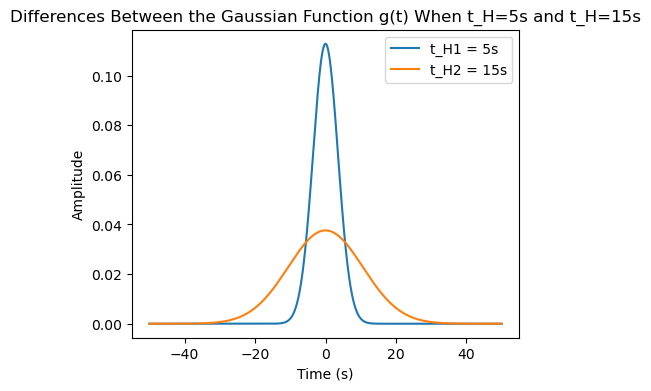

In [105]:
# Question 2.1

import numpy as np
import matplotlib.pyplot as plt

# Gaussian Function
def gaussian(t, t_H):
    return np.exp(-(t/t_H)**2) / (np.sqrt(np.pi) * t_H)

# Defining variables
dt = 0.001
t_H1 = 5
t_H2 = 15

# Define the time domain x-axis
t = np.arange(-50, 50, dt)

# Calculate the Gaussian Functions
g1 = gaussian(t, t_H1)
g2 = gaussian(t, t_H2)

# Graphing
plt.figure(figsize=(5, 4))
plt.plot(t, g1, label="t_H1 = 5s")
plt.plot(t, g2, label="t_H2 = 15s")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Differences Between the Gaussian Function g(t) When t_H=5s and t_H=15s")
plt.legend()
plt.show()


2. The analytical formula for the Fourier transform of $g(t)$ is

    $$ G(\omega) = e^\frac{-\omega^2 t_H^2}{4}. $$

    Compute the discrete Fourier transform (DFT) for both sampled $g(t)$
    time series, and compare them to the analytical $G(\omega)$
    for both $t_H$'s on the same graph.

    __Hints__: 
    - As numpy fft assumes signal starts from time 0, you can
    use the shift property of Fourier transform to first shift the $g(t)$
    to start from zero, and after `fftshift(fft())` operations, multiply
    the spectrum by complex exponential sinusoid function.
    - You need to sample the theoretical curve $G(w)$ with `w_axis = 2*pi*f_axis`, or else rewrite it as $G(f=\frac{w}{2\pi})$ if you'd rather sample it with `f_axis`
    - As a guide (so you can be confident of your fft utilization for the remainder of the lab), we expect that the amplitudes (use `numpy.abs(…)`) of the discrete FT and the continuous FT essentially match. The phase won’t necessarily match.

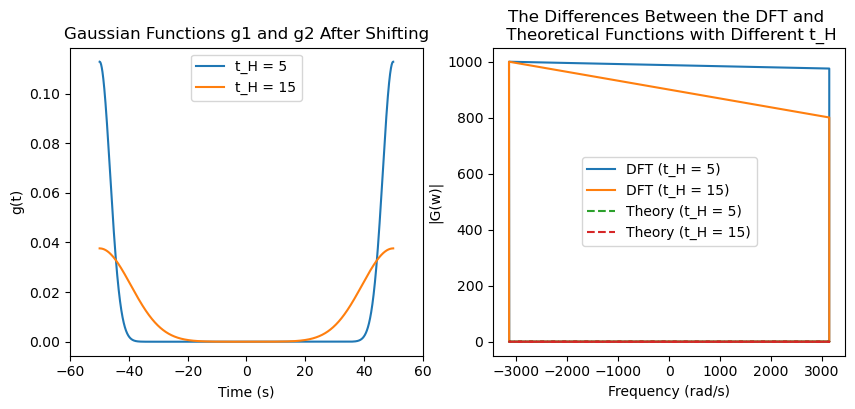

In [106]:
# Question 1.2

import numpy as np
import matplotlib.pyplot as plt
import math

# g1 and g2 are only the Gaussian functions from part 1

# shift the Gaussian functions to start at time 0
g1_shift = np.roll(g1, math.floor(len(g1)/2))
g2_shift = np.roll(g2, math.floor(len(g2)/2))

# Computing the DFT of the shifted Gaussian functions
G1 = np.fft.fftshift(np.fft.fft(g1_shift))
G2 = np.fft.fftshift(np.fft.fft(g2_shift))

# Computing the analytical Fourier transforms
f_axis = np.fft.fftfreq(len(t), d=0.001)
w_axis = 2 * np.pi * f_axis
G1_theoretical = np.exp(-(w_axis**2 * t_H1**2) / 4)
G2_theoretical = np.exp(-(w_axis**2 * t_H2**2) / 4)

# Graphing
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, g1_shift, label='t_H = 5')
plt.plot(t, g2_shift, label='t_H = 15')
plt.xlim(-60,60)
plt.xlabel('Time (s)')
plt.ylabel('g(t)')
plt.legend()
plt.title("Gaussian Functions g1 and g2 After Shifting")

plt.subplot(1, 2, 2)
plt.plot(w_axis, np.abs(G1), label='DFT (t_H = 5)')
plt.plot(w_axis, np.abs(G2), label='DFT (t_H = 15)')
plt.plot(w_axis, np.abs(G1_theoretical), '--', label='Theory (t_H = 5)')
plt.plot(w_axis, np.abs(G2_theoretical), '--', label='Theory (t_H = 15)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('|G(w)|')
plt.legend()
plt.title("The Differences Between the DFT and \n Theoretical Functions with Different t_H")

plt.show()

 3. Comment on the effect of filtering a general input time function $f(t)$ by $g(t)$
    (i.e. convolution of $f(t)$ with $g(t)$), and explain the difference in filtered output
    after applying Gaussian functions with $t_H = 5$ or $15$ secs.

When we are getting the convolution of f(t) with g(t), we are basically applying a filter that will smooth out the original general input time function f(t) over time. As shown in the previous diagrams. The difference in filtered output after applying Gaussian functions with t_H = 5 or t_H = 15 seconds is that the output from the tH = 15 filters is more smoothed out and contains fewer high-frequency components than the output from the tH = 5 filter. In other words, a larger t_H value can further smooth out the original function with less high frequencies, acting similarly to a low-pass filter. 

4. Comment on how this is related to the time-frequency uncertainty principle (a signal cannot
    be infinitesimally sharp both in time and frequency).

Here is the formula for the time-frequency unertainty principle that I found:

$$ (\int_{-\inf}^{inf} t^2 |f(t)|^2 dt)(\int_{-\inf}^{inf} \omega^2 |\hat{f}(\omega)|^2 d\omega)=\frac{1}{16 \pi ^2} $$

In this time-frequency uncertainty principle, the integral on the left side represents the time domain, and the integral on the right side represents the frequency domain. So, for example, since the product of the two integrals is a constant, the smaller the first integral is, meaning a tighter distribution in the time domain, the value for the second integral will become larger, giving us a larger distribution in the frequency domain with a larger uncertainty. Same vice versa. This means that it is impossible to have a perfect resolution in both the time and frequency domains simultaneously, just like how you can not know the position and momentum simultaneously in quantum mechanics. 

# Fourier transform of Window Functions (6 pts)

A continuous time signal $f(t)$ can be truncated into a signal of finite length
$T$ by window functions $b(t)$:

$$ g(t) = f(t) b(t) $$

Typical window functions include:

 * Boxcar function
    $$b(t) =
    \begin{cases}
    1 & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$
 * Hann window
    $$b(t) =
    \begin{cases}
    \frac{1}{2} \left( 1 - \cos \frac{2 \pi t}{T} \right) & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$

Now let $T = 10$ seconds, and sample both window functions by $\Delta t = 0.01$ seconds:


 1. Plot both window functions on the same graph.

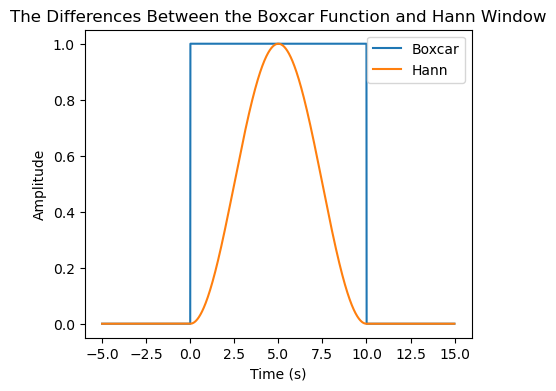

In [81]:
# Question 2.1

import numpy as np
import matplotlib.pyplot as plt

# Defining the time axis
T = 10
dt = 0.01
t = np.arange(-5, T + 5, dt)

# the boxcar window function
boxcar = np.arange(-5, T + 5, dt)
for i in range(len(boxcar)):
    if boxcar[i] >= 0 and boxcar[i] <= 10:
        boxcar[i] = 1
    else:
        boxcar[i] = 0

# the Hann window function
hann = np.arange(-5, T + 5, dt)
hann = 0.5*(1 - np.cos(2*np.pi*t/10))
hann[t > 10] = 0
hann[t < 0] = 0

# Graphing
plt.figure(figsize=(5, 4))
plt.plot(t, boxcar, label='Boxcar')
plt.plot(t, hann, label='Hann')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("The Differences Between the Boxcar Function and Hann Window")
plt.legend()
plt.show()

 2. Calculate the Fourier transform of both functions by numpy `fft()`. Pay extra attention to
    how you interpret the corresponding frequencies of output results from python.
    (_Hint_: `fftshift()` may be useful. Also pay attention to the length of the input signal
    (> 10 sec), as it dictates the frequency resolution for the spectrum.)

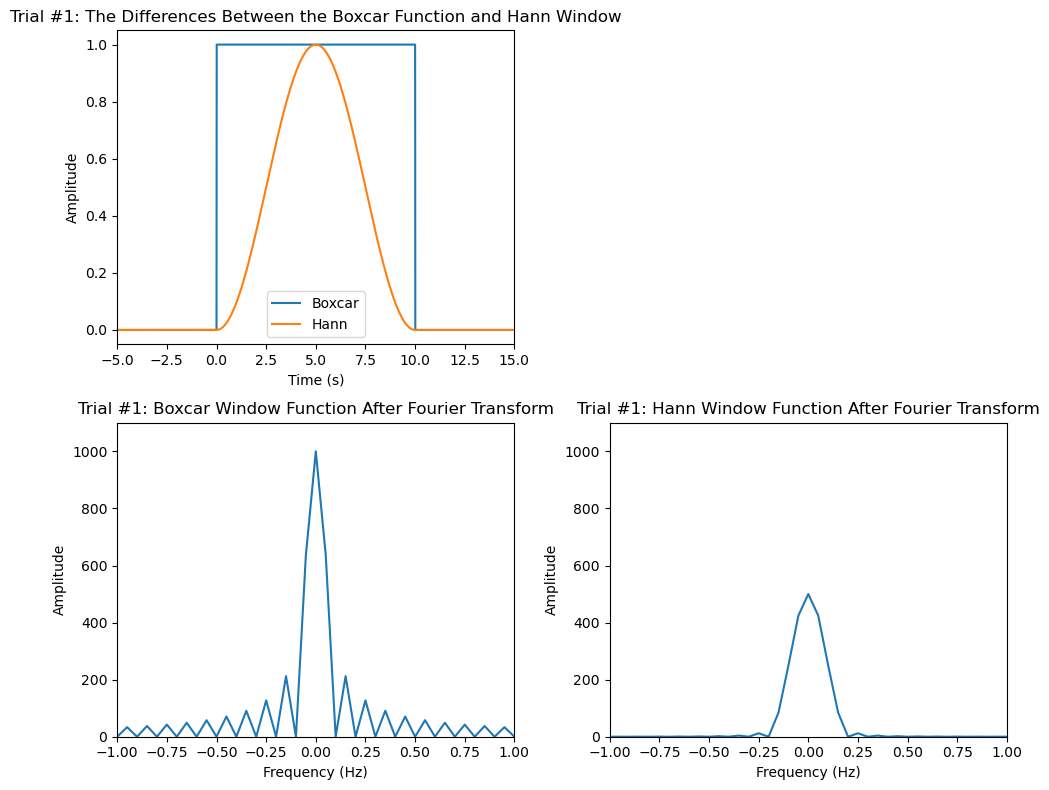

In [112]:
# Question 2.2 - part 1

# version 1

import numpy as np
import matplotlib.pyplot as plt

# Defining the time axis
T = 10
dt = 0.01
t = np.arange(-5, T + 5, dt)

# the boxcar window function
boxcar = np.arange(-5, T + 5, dt)
for i in range(len(boxcar)):
    if boxcar[i] >= 0 and boxcar[i] <= 10:
        boxcar[i] = 1
    else:
        boxcar[i] = 0

# the Hann window function
hann = np.arange(-5, T + 5, dt)
hann = 0.5*(1 - np.cos(2*np.pi*t/10))
hann[t > 10] = 0
hann[t < 0] = 0

# x-axis frequencies
freq = np.fft.fftfreq(len(boxcar), 0.01)
freq_shift = np.fft.fftshift(freq)

# Fourier transform of the Boxcar function
boxcar_fft = np.fft.fft(boxcar)
boxcar_fft_shift = np.fft.fftshift(boxcar_fft)

# Fourier transform of the Hann window function
hann_fft = np.fft.fft(hann)
hann_fft_shift = np.fft.fftshift(hann_fft)

# Graphing
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(t, boxcar, label='Boxcar')
plt.plot(t, hann, label='Hann')
plt.title("Trial #1: The Differences Between the Boxcar Function and Hann Window")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-5, 15)
plt.legend()

plt.subplot(2,2,3)
plt.plot(freq_shift, np.abs(boxcar_fft_shift))
plt.title('Trial #1: Boxcar Window Function After Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 1100)
plt.xlim(-1,1)

plt.subplot(2,2,4)
plt.plot(freq_shift, np.abs(hann_fft_shift))
plt.title('Trial #1: Hann Window Function After Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 1100)
plt.xlim(-1,1)

plt.tight_layout()
plt.show()

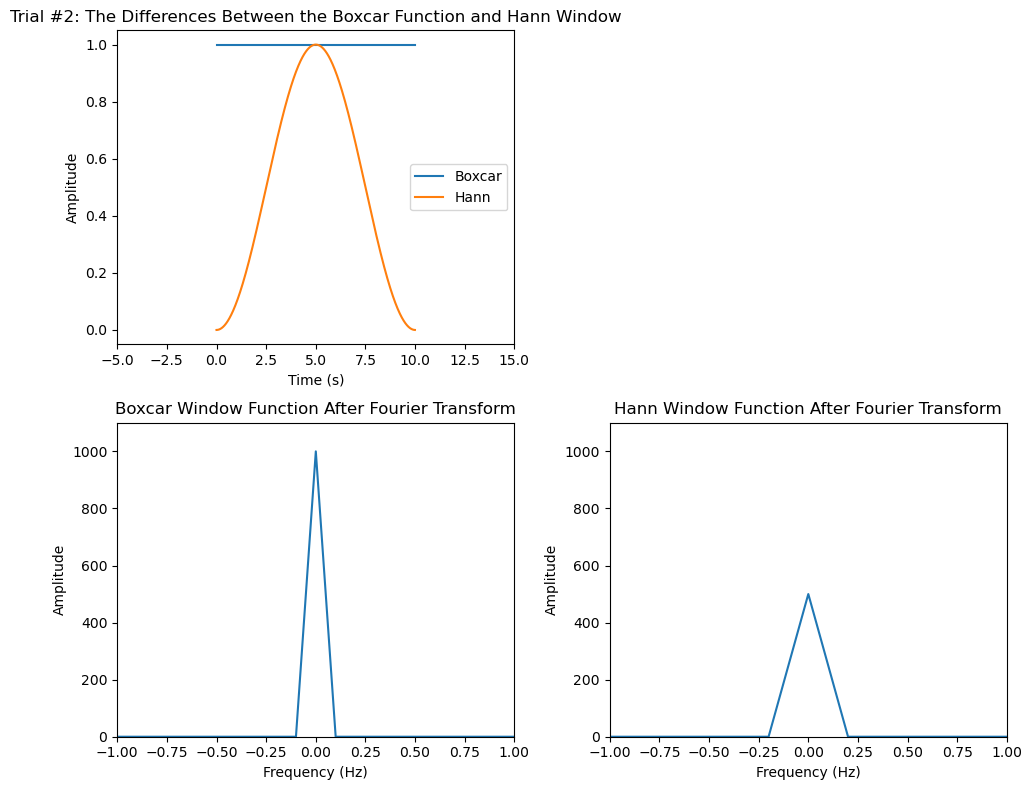

In [113]:
# Question 2.2 - part 2

# version 2: with different definitions for the two functions

import numpy as np
import matplotlib.pyplot as plt

# Define the time axis
T = 10
dt = 0.01
t = np.arange(0, T, dt)

# The boxcar window function
boxcar = np.zeros_like(t)
boxcar[t >= 0] = 1
boxcar[t <= 10] = 1

# Define the Hann window function
hann = 0.5 * (1 - np.cos(2*np.pi*t / 10))
hann[t > 10] = 0

# x-axis frequencies
freq = np.fft.fftfreq(len(boxcar), 0.01)
freq_shift = np.fft.fftshift(freq)

# Fourier transform of the Boxcar function
boxcar_fft = np.fft.fft(boxcar)
boxcar_fft_shift = np.fft.fftshift(boxcar_fft)

# Fourier transform of the Hann window function
hann_fft = np.fft.fft(hann)
hann_fft_shift = np.fft.fftshift(hann_fft)

# Graphing
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.plot(t, boxcar, label='Boxcar')
plt.plot(t, hann, label='Hann')
plt.title("Trial #2: The Differences Between the Boxcar Function and Hann Window")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(-5, 15)
plt.legend()

plt.subplot(2,2,3)
plt.plot(freq_shift, np.abs(boxcar_fft_shift))
plt.title('Boxcar Window Function After Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 1100)
plt.xlim(-1,1)

plt.subplot(2,2,4)
plt.plot(freq_shift, np.abs(hann_fft_shift))
plt.title('Hann Window Function After Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 1100)
plt.xlim(-1,1)

plt.tight_layout()
plt.show()

The two sets of diagram shows the Fourier Transform of both functions by numpy fft(). 

As you can see, depending on the length of the input signal, meaning if there is any extra 0s before or after the 0<x<T range, the final Fourier Transform of both functions would be different. 

 3. Plot the Fourier transform of both functions in the appropriate frequency range on the
    same graph.

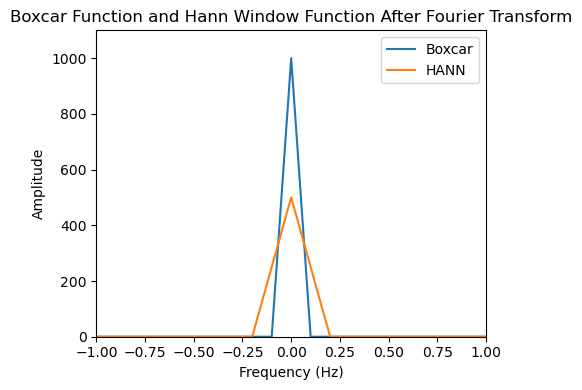

In [111]:
# Question 2.3

import numpy as np
import matplotlib.pyplot as plt

# Define the time axis
T = 10
dt = 0.01
t = np.arange(0, T, dt)

# The boxcar window function
boxcar = np.zeros_like(t)
boxcar[t >= 0] = 1
boxcar[t <= 10] = 1

# Define the Hann window function
hann = 0.5 * (1 - np.cos(2*np.pi*t / 10))
hann[t > 10] = 0

# x-axis frequencies
freq = np.fft.fftfreq(len(boxcar), 0.01)
freq_shift = np.fft.fftshift(freq)

# Fourier transform of the Boxcar function
boxcar_fft = np.fft.fft(boxcar)
boxcar_fft_shift = np.fft.fftshift(boxcar_fft)

# Fourier transform of the Hann window function
hann_fft = np.fft.fft(hann)
hann_fft_shift = np.fft.fftshift(hann_fft)

# Graphing
plt.figure(figsize=(5, 4))

plt.plot(freq_shift, np.abs(boxcar_fft_shift), label='Boxcar')
plt.plot(freq_shift, np.abs(hann_fft_shift), label='Hann')
plt.title('Boxcar Function and Hann Window Function After Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.ylim(0, 1100)
plt.xlim(-1,1)
plt.legend()

plt.tight_layout()
plt.show()

 4. Based on the FTs, comment on the effect of truncating a continuous time series by either
    window on its frequency spectrum $G(\omega)$ compared to the original spectrum $F(\omega)$.

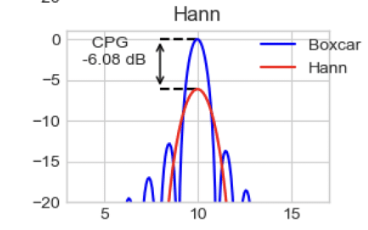

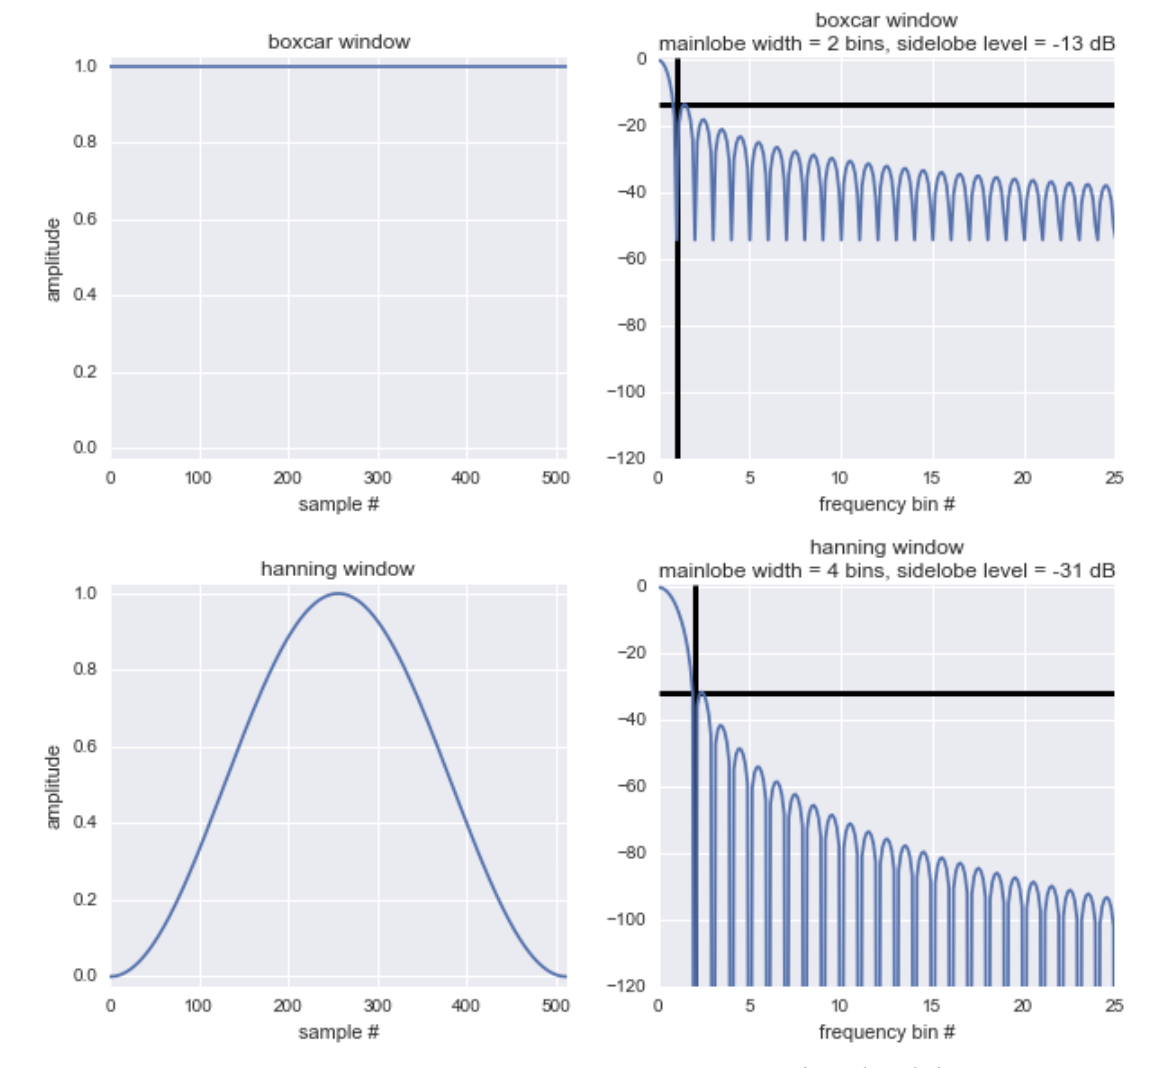

Both the Boxcar and Hann functions will turn the signal into a finite length since, by the way we define both of them, all the signals outside of the range [0, T] will become 0. 

In general, the Fourier transform of a truncated signal will result in a convolution of the original Fourier transform with the Fourier transform of the window function. This convolution results in a smoothing effect on the frequency spectrum, with the degree of smoothing determined by the shape of the window function.

I found a photo online comparing the results of a Boxcar function and a Hann function. As shown in the photo attached above, you can see that the boxcar window will give us a result with more oscillations on both sides, whereas the Hann function gives us something much smoother and cleaner, with the center standing out more. The Hanning Function is also missing a lot of the lower frequencies comparing to the Boxcarr functions if you compare the two result dunctions on the right.  


 5. Speculate on the advantages and disadvantages of boxcar and Hann window functions for truncation.

The biggest advantage of the Boxcar Function is that It is easy to implement. And since it has a rectangle shape, it can provide a uniform weighting to all samples within the truncated interval, making it very useful when all samples are equally important. However, the main disadvantage of it is that the rectangular shape of the boxcar window can lead to ringing artifacts in the time domain, which can introduce additional noise in the signal.

For the Hann window function, the biggest advantage of it is that it is apparently good enough to use for most of the scenarios because it is a good balance of all the important criteria, plus, it can act as a low pass filter by blocking out a lot of the higher frequencies. However, a big disadvantage, besides being harder to use than a boxcar window function, is that it has a slower roll-off compared to other window functions, such as the Hamming or Blackman windows. This can result in reduced frequency resolution.

# Radial Distribution Function (12 pts)

**Background**

 1. You may have noticed some resemblance between expression (6) and the Fourier transform.
    First show that the integration part $\int_0^\infty k (S(k) - 1) \sin(kr) dk$
    can be rewritten as

    $$p(r) = \int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk.$$
    
    __Hint__: The structure factor S(k) is even, since there should be no reason why scattering intensity would be different for one direction (+k) compared to its opposite (−k). Using the fact that S(k) is even may be useful.  


We know that based of Euler's formula
$sin(kr) = \frac{(e^{ikr} - e^{-ikr}}{2i})$

Then if we substitute that into $\int^{\infty}_{0}k(S(k) - 1) sin(kr)dk$

$$\int^{\infty}_{0}k(S(k) - 1)\frac{(e^{ikr} - e^{-ikr})}{2i}dk$$

And since we are given that $S(k)$ is even, we can split the integral into two parts at $x=0$

$$\int^{\infty}_{0}k(S(k) - 1)\frac{(e^{ikr} - e^{-ikr})}{2i}dk$$

$$= \int^{\infty}_{0}k(S(k) - 1)\frac{e^{ikr}}{2i}dk - \int^{\infty}_{0}k(S(k) - 1)\frac{e^{-ikr}}{2i}dk $$

$$= \frac{1}{2i}\int^{\infty}_{0}k(S(k) - 1)e^{ikr}dk - \frac{1}{2i} \int^{\infty}_{0}k(S(-k) - 1)e^{ikr}dk $$

$$= \frac{1}{2i}\int^{\infty}_{- \infty}k(S(k) - 1)e^{ikr}dk$$

2. Now we can make some connections between the Radial Transfer Function and the Fourier
    Transform, if we substitute $r \rightarrow t$ and $k \rightarrow \omega$. What is the Fourier transform
    $P(k)$ of $p(r)$? Is $P(k)$ a real, imaginary or general complex function? Is it even or odd? How will these
    affect $p(r)$? Is that what you expect? Plot $P(k)$ as a function of $k$ ranging from $-15\mathrm{\mathring{A}}^{-1}$ to $15\mathrm{\mathring{A}}^{-1}$
    based on `argon.py` (i.e. import and use the variables defined there).
    
    __Hint__: In constructing $S(k)$ from `argon.py`, you should make an "even" array twice the length (minus 1) of YanData. 
    YanData represents the structure factor (i.e. $S(k)$) for argon sampled at the $dk$ defined in the `argon.py` file. 
	It's specifically $S(k)$ sampled from `k = 0` to `k = len(YanData) * dk`, so create an even function out to the same length in the negative direction (i.e. the "k-axis" it's sampled on would be `-(len(YanData)-1)*dk,  ... 0, ..., + (len(YanData)-1)*dk`).

Liquids have no fixed internal structure. Yet they do have some short range order in the sense
that they have preferred intermolecular spacings, which are determined by the locations of minima
in the intermolecular potentials. The microscopic structure of liquids is often characterized by a
quantity known as the Radial Distribution Function $g(r)$, which is essentially the probability (Relative
to the average probability, which means that $g(r)$ tends to 1 at large $r$, where the neighbour is too far
away to feel any interaction.) that a molecule has a neighbouring molecule at distance $r$. Typically $g(r)$
shows a value that approaches zero at small $r$ since molecules cannot occupy the same space; it also shows a
peak at the preferred distance of nearest neighbours, and secondary peaks at preferred distances of more distant
neighbours. If a suitable collimated beam of particles (e.g. X-rays or neutrons) is sent through a
sample of the liquid, some of the particles are scattered. The number of particles scattered through
a given angle is related to the Fourier Transform of $g(r)$ evaluated at the wavenumber $k$
corresponding to the transverse momentum transfer associated with that scattering angle. Kittel derives
this relationship in Chapter 17 of Introduction to Solid State Physics.

If this all sounds complicated, all you need to know here is that something called the Structure
Factor $S(k)$ is effectively measured by looking at the scattered intensity as a function of
scattering transverse wavenumber $k$ (proportional to scattering angle), and that the Radial Distribution
Function is related to it by

$$ g(r) = 1 + \frac{1}{2 \pi^2 \rho r} \int_0^\infty k \left( S(k) - 1 \right) \sin(kr) dk $$

where $\rho$ is liquid number density (number of atoms per unit volume, computable from the three
constants mentioned in the introduction), $k$ is wavenumber, and $r$ is radius.




 3. Write a Python function `[gn, rn] = RDFcalc(S, dk, rho)` to calculate Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.

    __Hint__: for Python `fft()` and `ifft()` functions, realize that the values of the Fourier Transform
    corresponding to negative frequencies are stored in the second half of the arrays given to
    (`ifft`) or obtained from it (`fft`). You also have to study the difference between the DFT and
    FT to multiply the right factors.
 4. With the data provided in `argon.py`, compute the corresponding Radial Distribution Function
    $g(r)$. Plot your results for $r$ from $0$ to $30\mathrm{\mathring{A}}$;. Over what range of radius can you trust your
    result?

    __Hint__: To check if your results make sense, recall that $g(r)$ is related to the probability that a
    molecule has a neighbouring molecule at distance $r$, therefore, should be close to $0$
    when $r \rightarrow 0$, i.e. two molecules can not occupy the same space, and you can
    set $g(r = 0) = 0$. Recall $\lim_{r\rightarrow\infty}g(r)=1$. Also note the unit $\rho$ used in $g(r)$ formula (6).

 5. From the $g(r)$ you computed, estimate the average molecular radius $R_a$ of liquid argon. Give
    your reasoning and state what accuracy you can justify for your estimation.
 6. Now we explore the effect of sampling range. Yan sampled in wavenumber $k$ out to
    $k_{max} = 15.24\mathrm{\mathring{A}}^{-1}$, and he could have saved himself work by not collecting as much data,
    i.e., reducing $k_{max}$. But how much could he have reduced the sampling length $k_{max}$, while still
    seeing distinct peaks in the Radial Distribution Function? Also explain theoretically what you observe.

    __Hint__: Plot on top of the $g(r)$ obtained in Part 4, the $g(r)$'s you compute for a series of
    $k_{max}$ values. You can try half $k_{max}$ each time to look for changes. For the theoretical explanations
    for part 6 and 7, realize the interchangability of $t \leftrightarrow \omega$ ($r \leftrightarrow k$).

 7. To explore the effect of data sampling, let's assume Yan decided to save his work by sampling
    less often (i.e. increasing $dk$). How large a $dk$ can he use to be able to still recover the first
    two peaks clearly? State your answers and a theoretical justification for what you expect to
    see if you increase $dk$ too much.

    __Hint__: Plot on top of the $g(r)$ obtained from `argon.py` data, the $g(r)$'s you obtain when
    you subsample the same dataset. Try doubling $dk$ each time to observe the effect of coarser
    sampling.

## References
“Application Note AN014 Understanding FFTWINDOWS - Michigan State University.” Accessed March 11, 2023. https://www.egr.msu.edu/classes/me451/me451_labs/Fall_2013/Understanding_FFT_Windows.pdf. 

Bourdais, Florian Le. “On the Use of Windows in Digital Signal Processing.” On the use of windows in digital signal processing | Frolian's blog. Accessed March 5, 2023. https://flothesof.github.io/FFT-window-properties-frequency-analysis.html. 

“Discrete Fourier Transform (DFT) — Python Numerical Methods.” Accessed March 11, 2023. https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html. 

“Discrete Fourier Transform (Numpy.fft)#.” Discrete Fourier Transform (numpy.fft) - NumPy v1.24 Manual. Accessed March 10, 2023. https://numpy.org/doc/stable/reference/routines.fft.html#background-information. 

Mathuranathan. “Window Function - Figure of Merits.” GaussianWaves, October 24, 2021. https://www.gaussianwaves.com/2020/09/window-function-figure-of-merits/. 

“OpenCV 3 Tutorial.” OpenCV 3 Signal Processing with NumPy - Fourier Transform : FFT &amp; DFT - 2020. Accessed March 10, 2023. https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT.php#:~:text=The%20Discrete%20Fourier%20Transform%20(DFT,a%20sum%20of%20periodic%20components. 

Uncertainty Principles and the Fourier Transform. YouTube. YouTube, 2020. https://www.youtube.com/watch?v=D1WfID6kk90&amp;ab_channel=SteveBrunton. 